# An√°lisis de la Base de Datos


### **Selecci√≥n de la base de datos**
---

Se utilizar√° la base de datos [*Students Performance Dataset - Academic Success Factors in High School Students*](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset), la cual contiene datos acerca de estudiantes de escuela secundaria, sus actividades extracurriculares, las horas de estudio, etc. 

El objetivo de la red a realizar es, a partir de los datos provistos, poder predecir el rendimiento acad√©mico de los alumnos (en un principio, si es *bueno* o *malo*), y determinar qu√© caracter√≠sticas influyen en dichos resultados.


In [105]:
#Se importa la librer√≠a para procesar la base de datos
import pandas as pd 

#Estas funciones modifican cu√°ntos datos se ve cuando se imprime el dataframe üëá se puede ir tocando
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
#pd.reset_option('all') #Esto lo reinicia                            ----- # Comento esto porque hace saltar una advertencia (FutureWarning... tiene que ver con cosas de la librer√≠a que van a retirar pr√≥ximamente, creo.).

path_file = "students.csv"
dataframe = pd.read_csv(path_file) 
##print(dataframe)

In [106]:
dataframe.describe()

StudentID          Age       Gender    Ethnicity  ParentalEducation  StudyTimeWeekly     Absences     Tutoring  ParentalSupport  Extracurricular       Sports        Music  Volunteering          GPA   GradeClass
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000      2392.000000  2392.000000  2392.000000      2392.000000      2392.000000  2392.000000  2392.000000   2392.000000  2392.000000  2392.000000
mean   2196.500000    16.468645     0.510870     0.877508           1.746237         9.771992    14.541388     0.301421         2.122074         0.383361     0.303512     0.196906      0.157191     1.906186     2.983696
std     690.655244     1.123798     0.499986     1.028476           1.000411         5.652774     8.467417     0.458971         1.122813         0.486307     0.459870     0.397744      0.364057     0.915156     1.233908
min    1001.000000    15.000000     0.000000     0.000000           0.000000         0.001057     0.000000     0.000000         0.000000         0.000000     0.000000     0.000000      0.000000     0.000000     0.000000
25%    1598.750000    15.000000     0.000000     0.000000           1.000000         5.043079     7.000000     0.000000         1.000000         0.000000     0.000000     0.000000      0.000000     1.174803     2.000000
50%    2196.500000    16.000000     1.000000     0.000000           2.000000         9.705363    15.000000     0.000000         2.000000         0.000000     0.000000     0.000000      0.000000     1.893393     4.000000
75%    2794.250000    17.000000     1.000000     2.000000           2.000000        14.408410    22.000000     1.000000         3.000000         1.000000     1.000000     0.000000      0.000000     2.622216     4.000000
max    3392.000000    18.000000     1.000000     3.000000           4.000000        19.978094    29.000000     1.000000         4.000000         1.000000     1.000000     1.000000      1.000000     4.000000     4.000000


### **Tipos de datos**
---
A continuaci√≥n se detallan las columnas con las que se cuenta, y los tipos de datos que representan:
- ***StudentID***: N√∫mero de identificaci√≥n del estudiante (Categ√≥rica)
- ***Age***: Edad de los estudiantes (valores entre 15 y 18 a√±os) (Discreta)
- ***Gender***: G√©nero (0 = masculino, 1 = femenino) (Categ√≥rica)
- ***Ethnicity***: Etnia (0 = Cauc√°sico, 1 = Afroamericano, 2 = Asi√°tico, 3 = Otro) (Categ√≥rica)
- ***ParentalEducation***: Educaci√≥n m√°xima alcanzada por los padres (0 = Ninguna, 1 = Secundario completo, 2 = Universidad, 3 = Bachiller, 4 = M√°s alto) (Categ√≥rica)
- ***StudyTimeWeekly***: Horas semanales de estudio (Continua)
- ***Absences***: Inasistencias durante un a√±o (Discreta)
- ***Tutoring***: Si reciben tutor√≠a especial (0 = No, 1 = S√≠) (Categ√≥rica)
- ***ParentalSupport***: Nivel de apoyo de los padres (0 = Ninguno, 1 = Bajo, 2 = Moderado, 3 = Alto, 4 = Muy alto) (Categ√≥rica)
- ***Extracurricular-Sports-Music-Volunteering***: Si realiza actividades extracurriculares, como deportes, m√∫sica o solidarias (0 = No, 1 = S√≠) (Categ√≥rica)
- ***GPA***: Calificaci√≥n, en una escala de 2 a 4 (Continua)
- ***GradeClass***: Clasificaci√≥n seg√∫n GPA { 
    
                                        0: 'A' (GPA >= 3.5)
                                        1: 'B' (3.0 <= GPA < 3.5)
                                        2: 'C' (2.5 <= GPA < 3.0)
                                        3: 'D' (2.0 <= GPA < 2.5)
                                        4: 'F' (GPA < 2.0)(Categ√≥rica)}

### **Correlaciones**
---

Para determinar cu√°les de las caracter√≠sticas estudiadas tienen m√°s relaci√≥n con la calificaci√≥n de los estudiantes, que es lo que se quiere intentar predecir, se puede calcular el √≠ndice de correlaci√≥n entre las variables, donde valores cercanos a 1 y a -1 indican mayor dependencia positiva o negativa, respectivamente.
En caso de que los valores tiendan a 0, pr√°cticamente no hay ning√∫n tipo de relaci√≥n entre las variables.


In [107]:
#Evaluaci√≥n de correlaci√≥n de variables respecto de la columna "GPA"
print(dataframe.corr()["GPA"])

StudentID           -0.002697
Age                  0.000275
Gender              -0.013360
Ethnicity            0.027760
ParentalEducation   -0.035854
StudyTimeWeekly      0.179275
Absences            -0.919314
Tutoring             0.145119
ParentalSupport      0.190774
Extracurricular      0.094078
Sports               0.057859
Music                0.073318
Volunteering         0.003258
GPA                  1.000000
GradeClass          -0.782835
Name: GPA, dtype: float64


Para ilustrar mejor las correlaciones entre las distintas variables y la GPA, podemos hacer uso de una **matriz de correlaciones**:

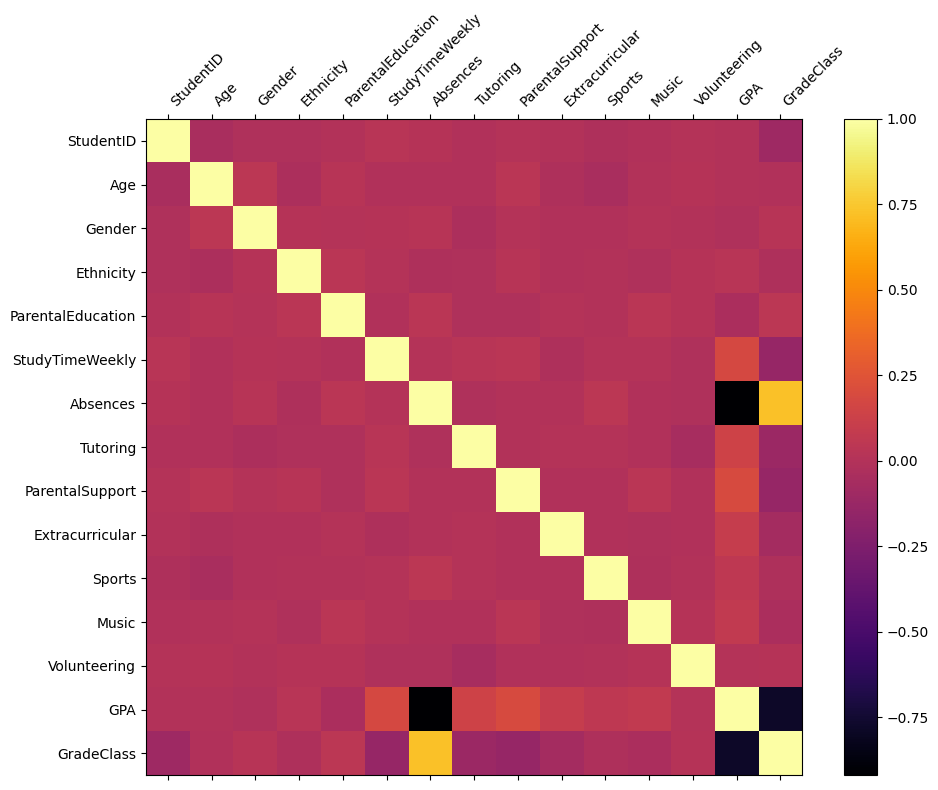

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Suponiendo que ya tienes cargado tu dataframe
dataframe = pd.read_csv("students.csv")

labels = dataframe.columns.to_list()

correlation_matrix = dataframe.corr() # Se calcula la matriz de correlaci√≥n.

fig, ax = plt.subplots(figsize=(10, 8)) # Ac√° grafica y de paso ajustamos tama√±o.

cax = ax.matshow(correlation_matrix, cmap="inferno")  # Se printea la matriz, cmap es para la paleta de colores. (creo que "inferno" es el que m√°s safa, cmap="Set1" es cursed)

fig.colorbar(cax) # Esta es la barra de colores lateral, ayuda a guiarse.

# Nombres
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

# Etiquetas
ax.set_xticklabels(labels, rotation=45, ha='left')  # Rotamos las etiquetas en el eje X para mejor legibilidad
ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()


Como se puede observar en la matriz de correlaciones, son un par de variables, o columnas, las que m√°s influyen en la GPA.

Tenemos que "StudyTimeWeekly", "Tutoring", "ParentalSupport" tienen cierta relaci√≥n positiva, mientras que "Absences" una relaci√≥n extremadamente negativa: a m√°s faltas, peor GPA.

Por otro lado, vemos que hay algunas columnas como "StudentID" (Directamente no suma nada), "Age", "Gender", "Ethnicity" o "Volunteering" que no aportan nada.

Luego, GradeClass es un caso especial, ya que esa variable categoriza el GPA del alumno (como se explic√≥ anteriormente), por ello la descartamos, nosotros somos los que queremos categorizar al alumno en **bueno** o **malo**.

### **An√°lisis de las variables**
---

Lo primero que podemos observar es que las variables que m√°s se relacionan con GPA son las inasistencias y la clasificaci√≥n seg√∫n GPA, ambas de forma negativa, lo cual, a simple vista, es l√≥gico. Pareciera ser que, a m√°s inasistencias, menor ser√° el rendimiento. Adem√°s, un valor de clasificaci√≥n bajo, por la forma en que se cre√≥ el dataframe, indica un GPA alto.
Otra observaci√≥n posible es que tanto el ID del estudiante, como su edad, g√©nero o etnia no influyen en las calificaciones de un alumno.

A continuaci√≥n, una clasificaci√≥n de las variables que consideraremos √∫tiles (o no) para nuestra red neuronal:

##### Variables que **s√≠** nos interesan **(Influyen en el GPA)**:
- **Inasistencias**  
   Se puede observar en la correlaci√≥n que a mayor n√∫mero de inasistencias, menor es el GPA.

Luego, en menor medida:

- **Horas semanales de estudio**
- **Tutor√≠a**
- **Soporte parental**
- **Deportes**
- **M√∫sica**

Estas √∫ltimas variables tienen una correlaci√≥n positiva moderada (aumentan a la par que el GPA), por lo que tambi√©n aportan informaci√≥n relevante sobre el GPA.
   
##### Variables que **no** nos interesan **(No influyen en el GPA)**:

- **Edad**
- **G√©nero**
- **Etnia**
- **Actividad solidaria** (actividad extracurricular)

Estas variables no presentan una relaci√≥n directa con el rendimiento acad√©mico medido por el GPA.

A continuaci√≥n, una representaci√≥n gr√°fica de las correlaciones anteriormente mencionadas.

Los gr√°ficos muestran la correlaci√≥n entre las distintas variables que mencionamos y el GPA.

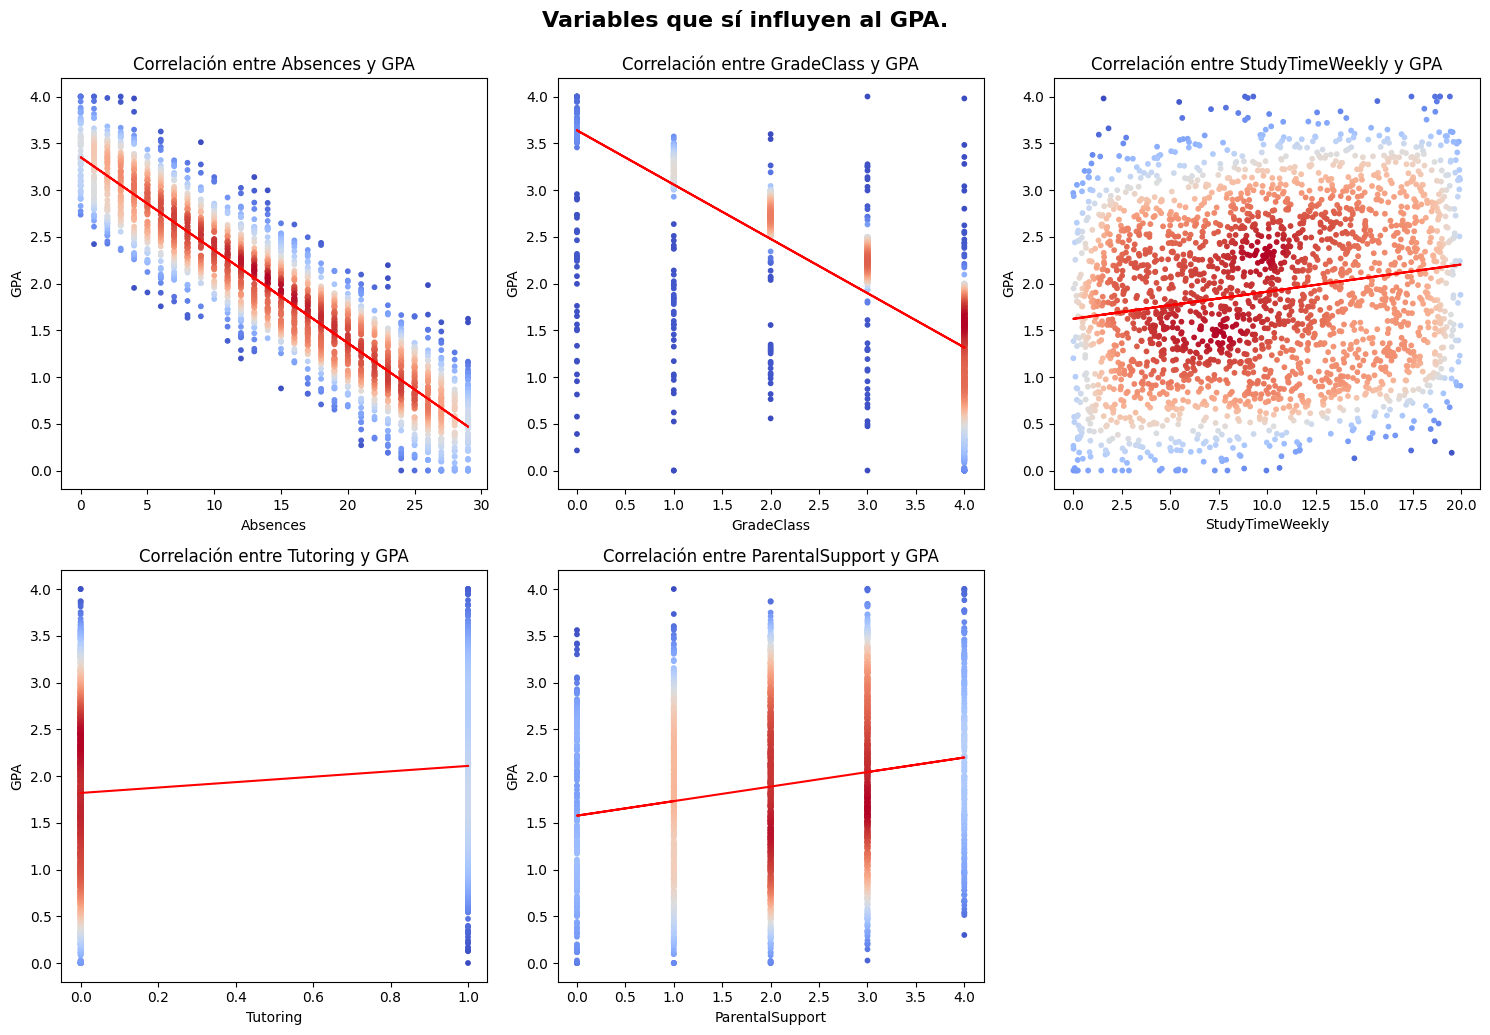

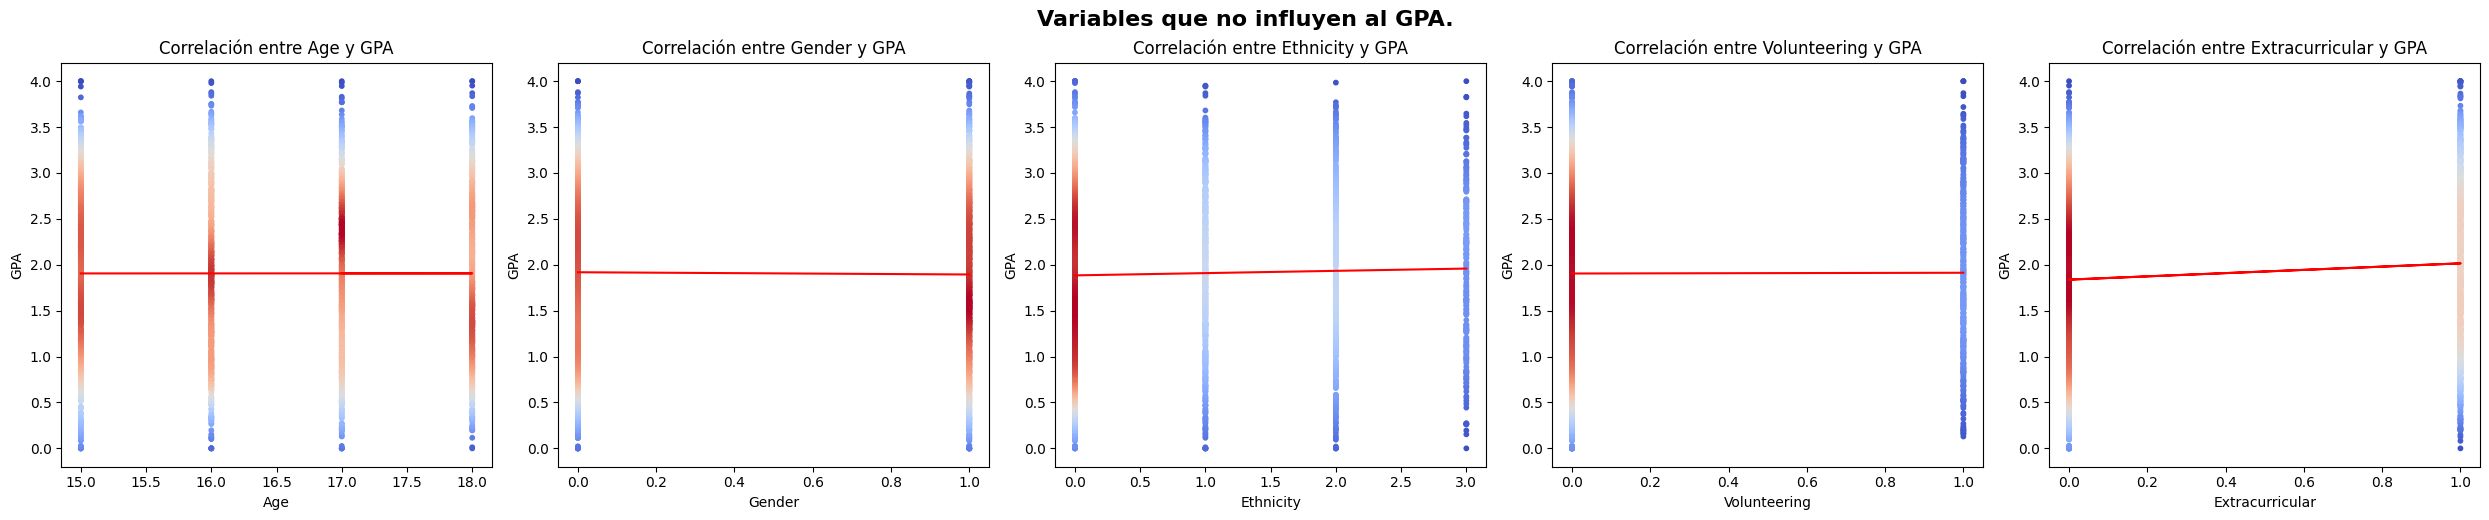

In [109]:
#Se importan las librer√≠as para crear los gr√°ficos
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

dataframe = pd.read_csv("students.csv") # Esto evita tener que ejecutar todo (Run All) para que funcione correctamente la celda de c√≥digo.

# Lista de variables que vamos a comparar contra el GPA. 
variablesConCorrelacion = ["Absences", "GradeClass", "StudyTimeWeekly", "Tutoring", "ParentalSupport"]
variablesSinCorrelacion = ["Age", "Gender", "Ethnicity", "Volunteering", "Extracurricular"]

# Funci√≥n para graficar listas de variables contra el GPA, ajustada para el n√∫mero de variables.
def graficadoraCorrelacionGPA(listaDeVariables, titulo, Large):
    num_variables = len(listaDeVariables)  # N√∫mero de variables en la lista

    if (Large):
        num_filas = (num_variables + 2) // 3  # Calcular el n√∫mero de filas necesarias (3 por fila)
        fig, axs = plt.subplots(num_filas, 3, figsize=(15, 5 * num_filas))
        axs = axs.flatten()
    else:
        fig, axs = plt.subplots(1, num_variables, figsize=(5 * num_variables, 5)) # Creamos una fila que contenga cada gr√°fico.
        axs = axs.flatten()

    for i, var in enumerate(listaDeVariables):  # Iteramos por cada elemento de la lista.
        x = dataframe[var]
        y = dataframe["GPA"]

        # Calcular la densidad de los puntos
        xy = np.vstack([x, y])
        densidad = gaussian_kde(xy)(xy)

        # Ordenamos por densidad
        idx = densidad.argsort()
        x, y, densidad = x[idx], y[idx], densidad[idx]

        # Graficamos el scatter plot usando la densidad para el color de los puntos
        sc = axs[i].scatter(x, y, c=densidad, cmap='coolwarm', s=10)  

        # Ajustamos una regresi√≥n lineal para ver mejor la correlaci√≥n
        m, b = np.polyfit(x, y, 1)
        axs[i].plot(x, (m * x + b), color="red")  # L√≠nea roja

        axs[i].set_title(f"Correlaci√≥n entre {var} y GPA")
        axs[i].set_xlabel(var)
        axs[i].set_ylabel("GPA")
    
    # Eliminar gr√°ficos vac√≠os
    for j in range(i + 1, len(axs)):  
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle(titulo, fontweight='bold', fontsize=16, y=1.03)
    plt.show()

# Ahora llamamos la funci√≥n para ambas listas
# En la funci√≥n agregu√© un par√°metro: "Large". Dependiendo si es true o false se genera un gr√°fico grande o peque√±o respectivamente.
graficadoraCorrelacionGPA(variablesConCorrelacion, "Variables que s√≠ influyen al GPA.", True)
graficadoraCorrelacionGPA(variablesSinCorrelacion, "Variables que no influyen al GPA.", False)

Con los gr√°ficos anteriores, queda en evidencia lo planteado.

Si bien podr√≠a no haber sido necesario hacerlos, con esto queda confirmado que hay variables que **no nos sirven**, como *age*, *gender*, *volunteering* o *ethnicity*. Y si bien en esta √∫ltima se aprecia una peque√±a pendiente, es despreciable, y m√°s a√∫n cuando no es nuestro objeto de estudio.

### **Factibilidad y Objetivo**
---
Consideramos que esta base de datos es los uficientemente adecuada para poder afrontar un trabajo pr√°ctico sobre redes neuronales b√°sicas: vamos a tratar de predecir algo simplemente binario (como practicamos), en este caso: si un alumno es **bueno** o **malo**.

Entonces, primero que nada, tenemos que tener en claro que nuestro objetivo es, dadas ciertas entradas (variables que s√≠ nos interesan), sobre estudiantes de secundaria que est√©n dentro del rango de nuestra muestra, poder hacer uso de nuestra red neuronal para intentar predecir con un cierto grado de precisi√≥n si este es un alumno **bueno** o **malo**. (es decir, si su GPA >= 2.5 o su GPA < 2.5 respectivamente.)

Para ello vamos a tener que tener en cuenta las columnas de las que disponemos, y seleccionar cu√°les nos sirven y cu√°les no, lo cual ya dejamos en claro anteriormente.

Repasando, vemos que las variables que m√°s influyen en el GPA de un alumno (positivamente) son las asistencias, horas semanales, tutoria, etc. Por otro lado, se puede observar que las que no influyen tienen que ver con la edad, el g√©nero, √©tnia y actividad solidaria.

Adem√°s tenemos casos como el de la etnia, donde se puede encontrar una muy leve correlaci√≥n (y tal vez sea interesante analizarlo brevemente), aunque es pr√°cticamente despreciable y no es precisamente el objetivo de este trabajo.

Y para redondear, la variable o columna "gradeClass" queda descartada por ir directamente de la mano con la variable que queremos predecir, GPA.

En s√≠ntesis, consideramos que tenemos una base de datos suficiente para lograr nuestro cometido, es decir, para montar una red neuronal b√°sica y aplicar los conceptos fundamentales que aprendimos a lo largo de la materia (tanto de an√°lisis como de machine learning).

###### Lo anterior es por ahora, si se nos hace f√°cil podr√≠amos intentar categorizar nosotros (aunque supuestamente necesitar√≠amos una muestra m√°s grandes y cambiar parte de la red, pero es posible), es decir, predecir a qu√© categoria (gradeClass) pertenece el alumno.

###### Probablemente falta explayarse m√°s en el objetivo y coso, lo dejo as√≠ por ahora. ¬Ø\_(„ÉÑ)_/¬Ø

### **Valores At√≠picos y Limpieza de Datos**
---

Para ver si tenemos valores at√≠picos problem√°ticos, es decir, que nos est√©n modificando la media de forma exagerada, o que de alguna otra forma distorsionen una posible interpretaci√≥n de los datos, podemos hacer uso de boxplots para identificarlos.

Finalmente, en caso de ser necesario, deberemos limpiarlos (eliminarlos o modificarlos).

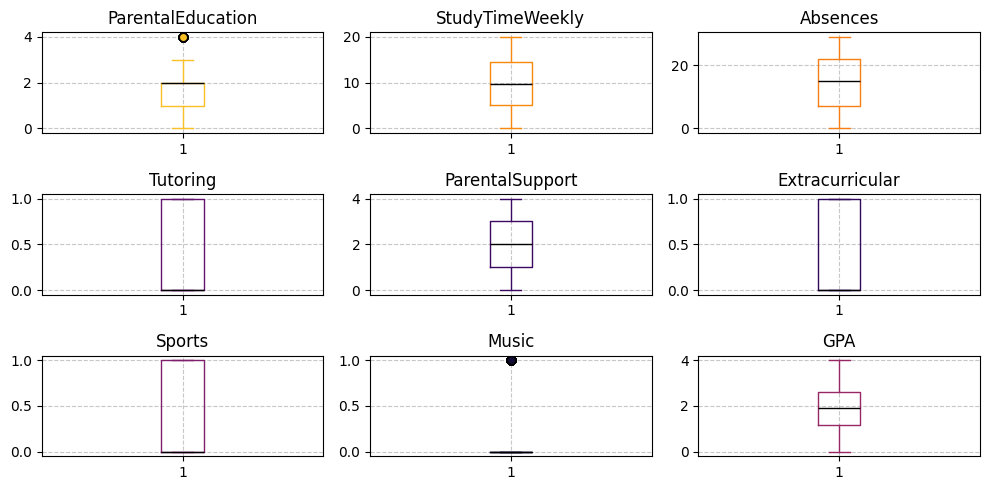

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("students.csv")
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass"], inplace = True)

cant_variables = len(dataframe.columns)
fig, axes = plt.subplots(3, 3, figsize=(10, 5)) # Ser√° una grilla 3x3 y con tama√±o 15 10.

colores = plt.get_cmap("inferno") # Sacamos el colormap de Inferno, simplemente para la facha.

# Creamos los boxplots.
for ax, col in zip(axes.flatten(), dataframe.columns):
    color = colores(np.random.rand()) # Sacamos un color random de Inferno.
    # A continuaci√≥n, a la hora de hacer el boxplot todo el choclo de props=dict es para ponerle color a la l√≠nea de la mediana, la caja, etc.
    ax.boxplot(dataframe[col],
               boxprops=dict(color=color),                              #Color
               medianprops=dict(color="black"),                         # ''
               whiskerprops=dict(color=color),                          # ''
               capprops=dict(color=color),                              # ''
               flierprops=dict(markerfacecolor=color, marker="o")       # ''
               )
    
    ax.set_title(col) # Ponemos el t√≠tulo.
    ax.grid(True, linestyle="--", alpha=0.7) # Activamos la grilla y lo configuramos.

plt.tight_layout()
plt.show()

In [ ]:
# Por cierto, se podr√≠a sacar GPA de ac√°. Aparte, columnas binarias (categ√≥ricas) capaz podr√≠amos sacarlas (extracurricular, tutoring, sports, etc)

Evidentemente, evaluando los boxplots, vemos que tenemos muy pocos valores at√≠picos.

Buen√≠simo, entonces no nos tenemos que preocupar por una distorsi√≥n enorme en nuestra base de datos que altere nuestra interpretaci√≥n/an√°lisis del data set.

Ahora, ¬øQu√© hacemos? En este caso, por tener tan pocos valores at√≠picos, podr√≠amos reemplazar esos valores at√≠picos por la **mediana**, de esa forma no estar√≠amos extrayendo un dato y dejando vac√≠a una celda de alguna columna (problemas), y a la vez es algo v√°lido y "seguro" podr√≠amos decir: si tomaramos la media en lugar de la mediana, si tendr√≠amos un problema, pues podr√≠amos estar reemplazando ese valor por uno ya sesgado.

Ahora que sabemos qu√© vamos a hacer, ¬øC√≥mo lo hacemos? Si recordamos, a la hora de hablar de valores at√≠picos estamos hablando de valores que se van "cierto porcentaje" de lo que es la media. Podemos recordar la distribuci√≥n normal y los cuartiles, y utilizando esa informaci√≥n "recortar los extremos" de la columna en cuesti√≥n (claramente esta ordenada en orden creciente o decreciente).

Entonces, en s√≠ntesis, analizando la distribuci√≥n de datos podemos utilizar los cuantiles y extraer valores at√≠picos. Sin embargo, ¬øQu√© me marca el l√≠mite?

Vamos a considerar que los valores que est√©n por fuera del siguiente rango de la muestra ser√°n valores at√≠picos:

- $[ Q1‚àí1.5√óIQRQ1‚àí1.5√óIQR ]$
- $ [Q3+1.5√óIQRQ3+1.5√óIQR] $

A continuaci√≥n la implementaci√≥n en c√≥digo y la supresi√≥n de dichos valores.


In [111]:
# Lo hago ma√±ana, me estoy durmeindo üò¥

### **Transformaciones**
---

En este caso, no es necesario realizar transformaciones a los datos, ya que est√°n convertidos a valores num√©ricos aptos para el desarrollo de una red neuronal, es decir, que pueden usarse para realizar multiplicaciones matriciales, y est√°n determinados siguiendo una determinada l√≥gica (por ejemplo, un valor m√°s bajo de clase implica un mejor rendimiento, y no es un n√∫mero asignado arbitrariamente). Sin embargo, s√≠ se puede eliminar en primera instancia las variables que no influyen en el rendimiento acad√©mico de los estudiantes, las cuales se detallaron m√°s arriba.

In [112]:
#Se elimina las columnas de ID, Edad, G√©nero y Etnia. # Agrego las otras dos que tampoco aportan algo relevante.
dataframe = pd.read_csv("students.csv") # Si no lo pongo, tira error por m√°s que se haga (Run All).
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity", "Volunteering", "GradeClass"], inplace = True)

print(dataframe)

      ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music       GPA
0                     2        19.833723         7         1                2                0       0      1  2.929196
1                     1        15.408756         0         0                1                0       0      0  3.042915
2                     3         4.210570        26         0                2                0       0      0  0.112602
3                     3        10.028829        14         0                3                1       0      0  2.054218
4                     2         4.672495        17         1                3                0       0      0  1.288061
5                     1         8.191219         0         0                1                1       0      0  3.084184
6                     1        15.601680        10         0                3                0       1      0  2.748237
7                     4        15.424496